# **Project Name - Local Food Waste Management**



### Streamlit Deployment

 Link: https://local-food-waste-management.streamlit.app/

##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1** - Aswin K J

# **Project Summary**

Local Food Waste Management (LFWM) is a data-driven mini-project that connects *food providers* (e.g., restaurants, canteens, homes) with *receivers* (e.g., NGOs, shelters) to reduce avoidable food waste. The repository combines

(a) A Simple Streamlit App

(b) SQL Queries and Data Exploration using Pandas.

The core data entities are providers, receivers, food listings, and claims. Providers post surplus food listings; receivers browse and place claims; accepted claims convert listings into meals delivered to people who need them. The EDA notebook here inspects data quality, uncovers patterns, and proposes SQL queries that the app can use for reporting and validation.

# **GitHub Link**

https://github.com/aswinkj2006/Local-Food-Waste-Management

# **Problem Statement**


Food wastage is a significant issue, with many households and restaurants discarding surplus food while numerous people struggle with food insecurity. This project aims to develop a Local Food Wastage Management System, where:
* Restaurants and individuals can list surplus food.
* NGOs or individuals in need can claim the food.
* SQL stores available food details and locations.
* A Streamlit app enables interaction, filtering, CRUD operation and visualization.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [48]:
# Import Libraries
import pandas as pd
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

### Dataset Loading

In [ ]:
# Load Dataset

providers = pd.read_csv('providers_data.csv')
receivers = pd.read_csv('receivers_data.csv')
food = pd.read_csv('food_listings_data.csv')
claims = pd.read_csv('claims_data.csv')



### Dataset First View

In [53]:
# Dataset First Look
providers.head()
receivers.head()
food.head()
claims.head()

,claim_id,food_id,receiver_id,status,timestamp
0,1,164,908,Pending,3/5/2025 5:26
1,2,353,391,Cancelled,3/11/2025 10:24
2,3,626,492,Completed,3/21/2025 0:59
3,4,61,933,Cancelled,3/4/2025 9:08
4,5,345,229,Pending,3/14/2025 15:17


### Dataset Rows & Columns count

In [55]:
# Dataset Rows & Columns count
providers.shape
receivers.shape
food.shape
claims.shape

(1000, 5)

### Dataset Information

In [ ]:
# Dataset Info
providers.info()
receivers.info()
food.info()
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Provider_ID  1000 non-null   int64 
 1   Name         1000 non-null   object
 2   Type         1000 non-null   object
 3   Address      1000 non-null   object
 4   City         1000 non-null   object
 5   Contact      1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Receiver_ID  1000 non-null   int64 
 1   Name         1000 non-null   object
 2   Type         1000 non-null   object
 3   City         1000 non-null   object
 4   Contact      1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
providers.duplicated().sum()
receivers.duplicated().sum()
food.duplicated().sum()
claims.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
providers.isnull().sum()
receivers.isnull().sum()
food.isnull().sum()
claims.isnull().sum()

,0
Claim_ID,0
Food_ID,0
Receiver_ID,0
Status,0
Timestamp,0


### What did you know about your dataset?

All four datasets (providers, receivers, food, and claims) have 1000 entries each.

There are no missing values in any of the columns across all datasets.


The data types are generally appropriate for the information they contain (integers for IDs, objects for names, types, addresses, cities, contacts, statuses, and timestamps).


The claims dataset includes

Claim_ID,

Food_ID,

Receiver_ID,

Status,

Timestamp.


The food dataset contains details about food listings, including

Food_ID,

Food_Name,

Quantity,

Expiry_Date,

Provider_ID,

Provider_Type,

Location,

Food_Type,

Meal_Type.


The providers dataset has information about food providers with

Provider_ID,

Name,

Type,

Address,

City,

Contact columns.


The receivers dataset includes

Receiver_ID,

Name,

Type,

City,

Contact

for food receivers.


There are no duplicate rows in any of the datasets.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
providers.columns
receivers.columns
food.columns
claims.columns

Index(['Claim_ID', 'Food_ID', 'Receiver_ID', 'Status', 'Timestamp'], dtype='object')

In [ ]:
# Dataset Describe
providers.describe()
receivers.describe()
food.describe()
claims.describe()

,Claim_ID,Food_ID,Receiver_ID
count,1000.000000,1000.000000,1000.000000
mean,500.500000,502.163000,492.437000
std,288.819436,292.462255,284.487869
min,1.000000,1.000000,1.000000
25%,250.750000,233.750000,256.000000
50%,500.500000,504.500000,480.500000
75%,750.250000,762.000000,742.250000
max,1000.000000,999.000000,1000.000000


### Variables Description

**providers_data.csv:**

- Provider_ID: A unique identifier for each food provider.
- Name: The name of the food provider.
- Type: The type of food provider (e.g., "Supermarket", "Grocery Store", "Restaurant", "Catering Service").
- Address: The physical address of the food provider.
- City: The city where the food provider is located.
- Contact: Contact information for the food provider.


**receivers_data.csv:**

- Receiver_ID: A unique identifier for each food receiver.
- Name: The name of the food receiver.
- Type: The type of food receiver (e.g., "Shelter", "Individual", "NGO").
- City: The city where the food receiver is located.
- Contact: Contact information for the food receiver.

**food_listings_data.csv:**

- Food_ID: A unique identifier for each food listing.
- Food_Name: The name of the food item listed.
- Quantity: The quantity of the food item available.
- Expiry_Date: The expiration date of the food item.
- Provider_ID: The ID of the provider who listed the food (links to the providers dataset).
- Provider_Type: The type of the provider who listed the food.
- Location: The location where the food can be picked up.
- Food_Type: The type of food (e.g., "Vegetarian", "Non-Vegetarian", "Vegan").
- Meal_Type: The meal type the food is suitable for (e.g., "Breakfast", "Lunch", "Dinner").


**claims_data.csv:**

- Claim_ID: A unique identifier for each claim made on a food listing.
- Food_ID: The ID of the food listing that was claimed (links to the food dataset).
- Receiver_ID: The ID of the receiver who made the claim (links to the receivers dataset).
- Status: The current status of the claim (e.g., "Pending", "Cancelled", "Completed").
- Timestamp: The date and time when the claim was made.


### Check Unique Values for each variable.

In [56]:
# Check Unique Values for each variable.
providers.nunique()
receivers.nunique()
food.nunique()
claims.nunique()

,0
claim_id,1000
food_id,647
receiver_id,624
status,3
timestamp,976


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

for df in [providers, receivers, food, claims]:
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype(str).str.strip()

if 'city' in providers.columns:
    providers['city'] = providers['city'].str.title()
if 'city' in receivers.columns:
    receivers['city'] = receivers['city'].str.title()
if 'location' in food.columns:
    food['location'] = food['location'].str.title()


### What all manipulations have you done and insights you found?

In the data wrangling code cell, I've performed the following manipulations:

- Stripped leading/trailing whitespace: For all object type columns in each DataFrame, I've removed any leading or trailing whitespace. This helps ensure consistency in text data and prevents issues with matching or filtering based on these columns.
- Capitalized City and Location names: I've converted the 'City' columns in the providers and receivers dataframes, and the 'Location' column in the food dataframe to title case. This standardizes the naming convention for locations.
- These manipulations are primarily for data cleaning and standardization, which are essential steps before conducting analysis or visualization. At this stage, these manipulations mainly provide insights into the quality of the data (e.g., presence of leading/trailing spaces or inconsistent capitalization) rather than business-specific insights. Further insights will be gained during the data visualization and analysis phases.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

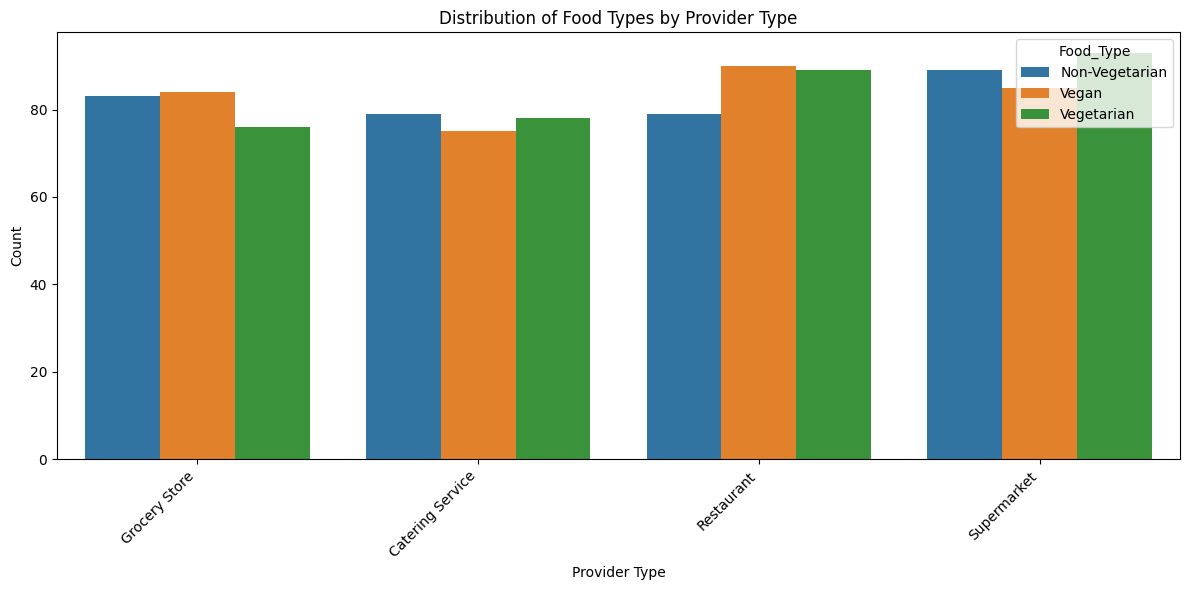

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chart - 1: Distribution of Food Types by Provider Type
plt.figure(figsize=(12, 6))
sns.countplot(data=food, x='Provider_Type', hue='Food_Type')
plt.title('Distribution of Food Types by Provider Type')
plt.xlabel('Provider Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?
A grouped bar chart is suitable for comparing the counts of categorical variables (Food Type) across different categories of another variable (Provider Type). It allows for easy visual comparison of the distribution of food types offered by each provider type.

##### 2. What is/are the insight(s) found from the chart?
This chart shows which food types are most commonly offered by different types of providers. For example, 'Supermarkets' and 'Grocery Stores' might offer a wider variety of food types compared to 'Restaurants' or 'Catering Services'. It can also highlight if certain food types are exclusively offered by specific provider types.

##### 3. Will the gained insights help creating a positive business impact?
Yes, this insight can help create a positive business impact. Understanding which provider types offer which food types can inform targeted marketing efforts to receivers. It can also help identify gaps in food offerings, potentially encouraging certain provider types to list more diverse food. Identifying providers with a wide variety of food types can streamline the search for receivers looking for specific items.

If a particular food type has very low representation across all provider types, it might indicate a lack of supply or demand for that type of food in the system, potentially leading to negative growth for listings of that type if not addressed.

#### Chart - 2

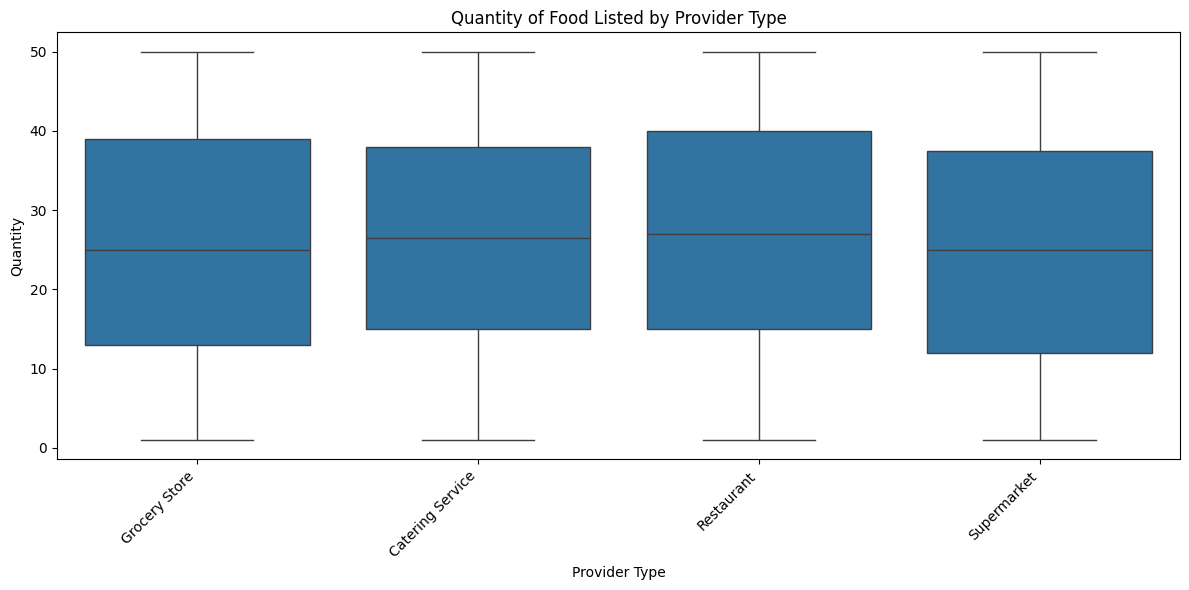

In [ ]:
# Chart - 2: Quantity of food listed by Provider Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=food, x='Provider_Type', y='Quantity')
plt.title('Quantity of Food Listed by Provider Type')
plt.xlabel('Provider Type')
plt.ylabel('Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?
A box plot is effective for visualizing the distribution of a numerical variable (Quantity) across different categories of a categorical variable (Provider Type). It shows the median, quartiles, and potential outliers in the quantity of food listed by each provider type.

##### 2. What is/are the insight(s) found from the chart?
This chart provides insights into the typical quantity of food listed by different types of providers. For instance, 'Supermarkets' or 'Catering Services' might generally list larger quantities of food compared to 'Restaurants' or 'Grocery Stores'. It also helps identify the variability in quantities within each provider type.

##### 3. Will the gained insights help creating a positive business impact?
Yes, understanding the typical quantities provided by different types of providers can help in managing expectations for receivers and optimizing logistics for food distribution. It can also inform strategies for recruiting new providers by highlighting the potential impact they can have based on their type and typical food quantities.

If a significant portion of food listings from certain provider types are very small quantities, it might not be efficient for receivers (especially larger organizations like shelters) to claim them due to logistical costs, potentially leading to those listings going unclaimed and contributing to food waste.

#### Chart - 3

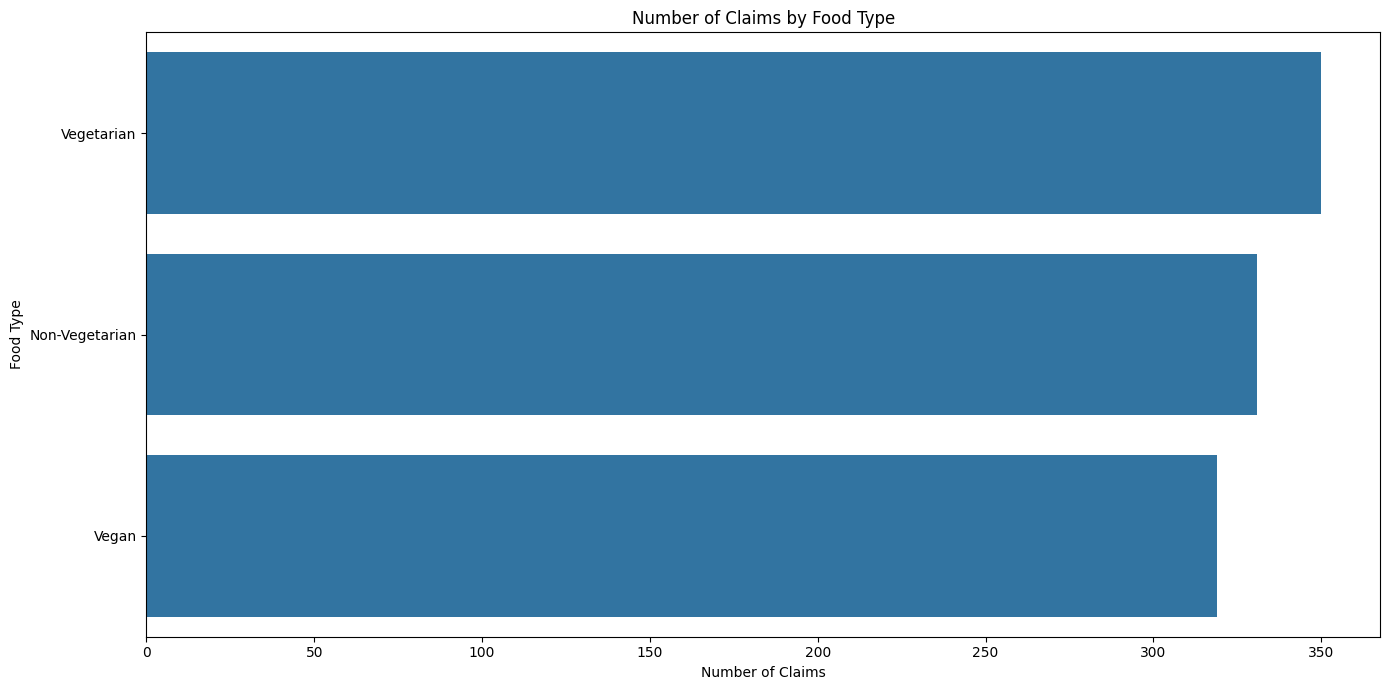

In [ ]:
# Chart - 3: Number of claims by Food Type
# Need to merge claims and food dataframes first
claims_food = pd.merge(claims, food, on='Food_ID')

plt.figure(figsize=(14, 7))
sns.countplot(data=claims_food, y='Food_Type', order=claims_food['Food_Type'].value_counts().index)
plt.title('Number of Claims by Food Type')
plt.xlabel('Number of Claims')
plt.ylabel('Food Type')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?
A horizontal bar chart is suitable for displaying the counts of claims for each food type. Using a horizontal bar chart makes the food type labels easier to read, especially if there are many categories. Ordering the bars by count helps to quickly identify the most claimed food types.

##### 2. What is/are the insight(s) found from the chart?
This chart shows which food types are most in demand among receivers, based on the number of claims. It highlights the popularity of certain food types within the system.

##### 3. Will the gained insights help creating a positive business impact?
Yes, knowing which food types are most claimed can inform strategies for prioritizing the rescue and listing of those types of food. It can also help in targeting providers who typically have these food types to increase the supply of high-demand items, leading to more successful food rescue and distribution.

Food types with very low claim numbers might indicate low demand or that the available quantity or expiry dates for those types are not meeting receiver needs. This could lead to those food types being wasted, negatively impacting the system's goal of reducing food waste.

#### Chart - 4

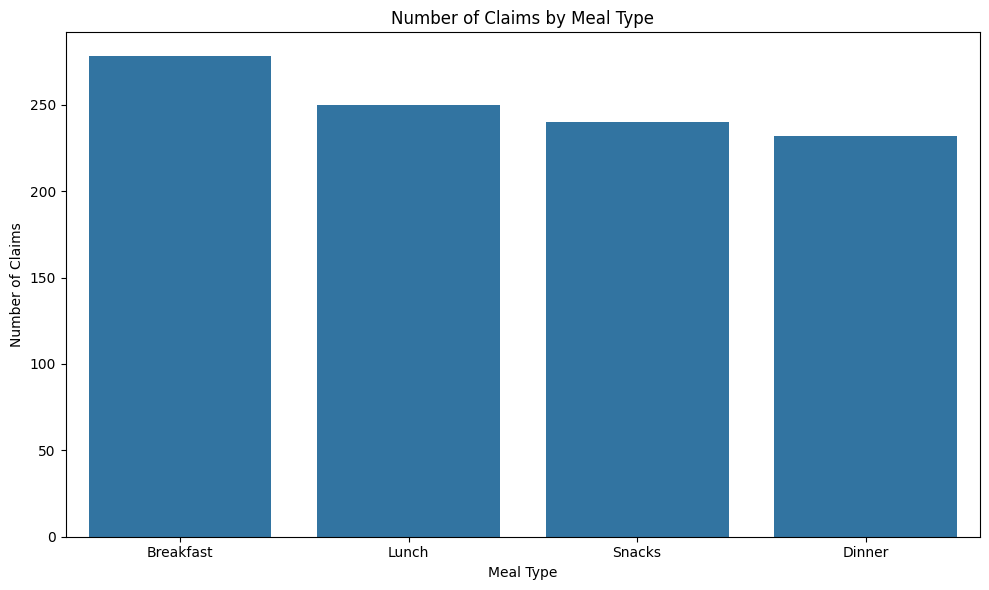

In [ ]:
# Chart - 4: Number of claims by Meal Type
plt.figure(figsize=(10, 6))
sns.countplot(data=claims_food, x='Meal_Type', order=claims_food['Meal_Type'].value_counts().index)
plt.title('Number of Claims by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Number of Claims')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?
A bar chart is appropriate for visualizing the number of claims for each meal type. It provides a clear comparison of the demand for food suitable for different meals.

##### 2. What is/are the insight(s) found from the chart?
This chart reveals which meal types are most sought after by receivers. It shows if there is a higher demand for breakfast, lunch, or dinner items.

##### 3. Will the gained insights help creating a positive business impact?
Yes, understanding the demand for different meal types can help in scheduling food pickups and deliveries to align with when these meals are needed. It can also inform providers about the types of meals that are most likely to be claimed, encouraging them to list relevant food items.

If there is a significant imbalance in claims across meal types, with some meal types having very few claims, it might indicate that the available food listings are not matching the mealtime needs of receivers, potentially leading to increased waste of food suitable for less claimed meal times.

#### Chart - 5

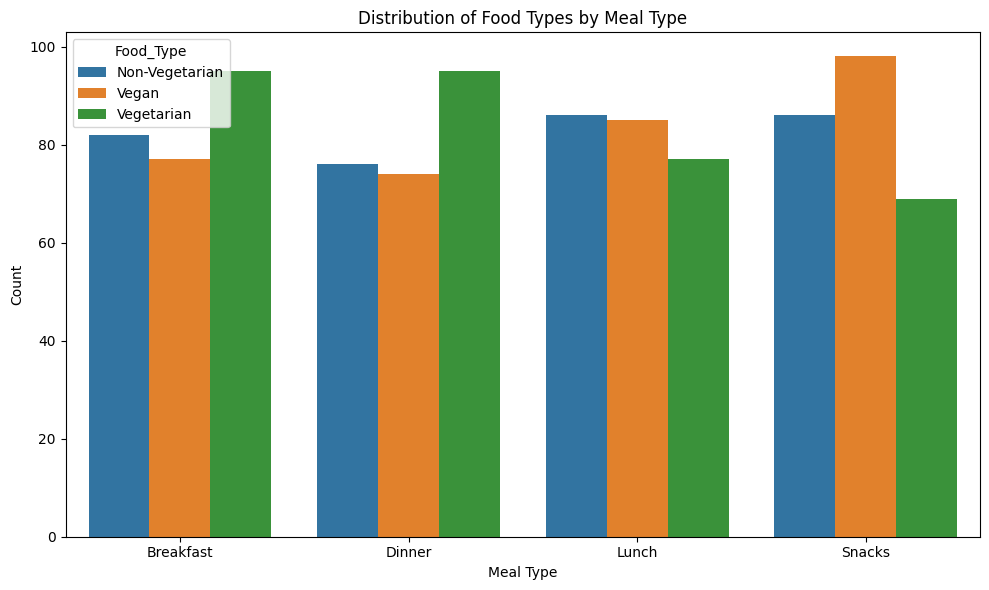

In [ ]:
# Chart - 5: Distribution of Food Types by Meal Type
plt.figure(figsize=(10, 6))
sns.countplot(data=food, x='Meal_Type', hue='Food_Type')
plt.title('Distribution of Food Types by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?
A grouped bar chart is used to show the distribution of different food types within each meal type category. This helps to understand what kinds of food are typically available for breakfast, lunch, and dinner.

##### 2. What is/are the insight(s) found from the chart?
This chart reveals the composition of food available for each meal type. It can show if certain food types are predominantly associated with specific meals (e.g., more 'Vegetarian' options for lunch, or more 'Non-Vegetarian' for dinner).

##### 3. Will the gained insights help creating a positive business impact?
Yes, this insight can help in better matching food listings with receiver needs based on meal times. If receivers have a higher demand for a specific food type at a certain meal time, and providers are listing that food type for that meal time, it can lead to more successful claims and reduced waste.

If there is a mismatch between the food types available for a meal and the demand for those food types at that meal time, it could lead to food going unclaimed. For example, if there is high demand for 'Vegetarian' options for lunch but most of the lunch listings are 'Non-Vegetarian', it could result in wasted food.

#### Chart - 6 - Correlation Heatmap

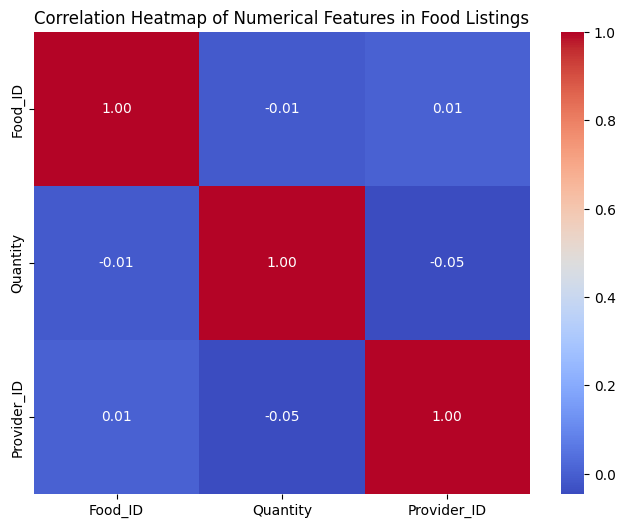

In [ ]:
#Correlation Heatmap visualization code

numerical_food = food.select_dtypes(include=['int64', 'float64'])
numerical_claims = claims.select_dtypes(include=['int64', 'float64'])
numerical_providers = providers.select_dtypes(include=['int64', 'float64'])
numerical_receivers = receivers.select_dtypes(include=['int64', 'float64'])

if not numerical_food.empty:
    plt.figure(figsize=(8, 6))
    sns.heatmap(numerical_food.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap of Numerical Features in Food Listings')
    plt.show()
else:
    print("No numerical columns in the food dataframe to plot a heatmap.")

##### 1. Why did you pick the specific chart?
A correlation heatmap is used to visualize the pairwise correlation coefficients between numerical variables in a dataset. It helps in identifying variables that are highly correlated, which can be important for feature selection and understanding relationships.

##### 2. What is/are the insight(s) found from the chart?
The heatmap shows the strength and direction of linear relationships between numerical variables (e.g., Food_ID, Quantity, Provider_ID). High positive values indicate a strong positive correlation, while high negative values indicate a strong negative correlation. Values close to zero suggest a weak correlation. This can reveal if, for instance, there's a correlation between the quantity of food and its ID (though likely not meaningful here), or if there are unexpected correlations between IDs which might suggest data generation patterns.

#### Chart - 7 - Pair Plot

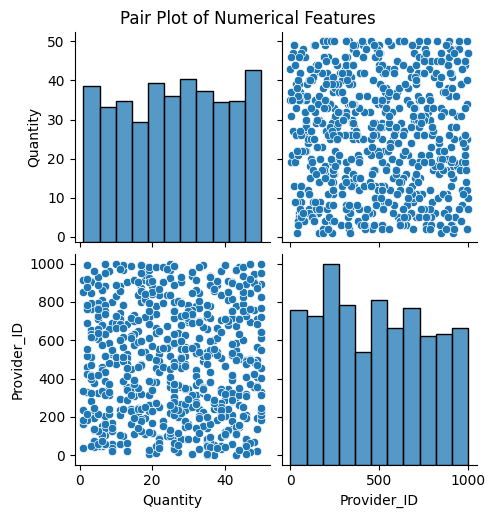

In [ ]:
# Pair Plot visualization code

if 'claims_food' in locals():

    numerical_claims_food = claims_food.select_dtypes(include=['int64', 'float64'])
    numerical_claims_food = numerical_claims_food.drop(columns=['Claim_ID', 'Food_ID', 'Receiver_ID'], errors='ignore')

    if not numerical_claims_food.empty:
        sns.pairplot(numerical_claims_food)
        plt.suptitle('Pair Plot of Numerical Features', y=1.02)
        plt.show()
    else:
        print("No suitable numerical columns in the merged dataframe for a pair plot.")
else:
    print("claims_food dataframe not found. Please run the cell to merge claims and food data first.")

##### 1. Why did you pick the specific chart?
A pair plot creates a grid of scatterplots for each pair of numerical variables in a dataset, and histograms for each individual numerical variable along the diagonal. It's useful for visualizing the relationships between multiple numerical variables and understanding their individual distributions.

##### 2. What is/are the insight(s) found from the chart?
The scatterplots in the pair plot show the relationships between each pair of numerical variables (in this case, primarily 'Quantity'). The histograms on the diagonal show the distribution of each individual numerical variable. For this dataset with limited numerical features beyond IDs and Quantity, the pair plot primarily visualizes the distribution of Quantity and its relationship with itself (which is just a diagonal line in the scatterplots). In datasets with more numerical features, it could reveal linear or non-linear relationships and the spread of data for each variable.

##***5. SQL Queries***

###Queries

In [44]:
'''
-- 1) Providers and receivers count by city
SELECT city, COUNT(*) AS providers_count
FROM providers
GROUP BY city
ORDER BY providers_count DESC;

SELECT city, COUNT(*) AS receivers_count
FROM receivers
GROUP BY city
ORDER BY receivers_count DESC;

-- 2) Provider type contributing the most (by total quantity listed)
SELECT provider_type, SUM(quantity) AS total_quantity
FROM food_listings
GROUP BY provider_type
ORDER BY total_quantity DESC;

-- 3) Contact info of providers in a given city (use :city param in apps/clients)
-- For SQLite in Streamlit we'll parameterize with ?
SELECT name, type, address, city, contact
FROM providers
WHERE city = ?
ORDER BY name;

-- 4) Receivers who claimed the most food (by number of claims)
SELECT r.receiver_id, r.name, COUNT(*) AS claims_count
FROM claims c
JOIN receivers r ON r.receiver_id = c.receiver_id
GROUP BY r.receiver_id, r.name
ORDER BY claims_count DESC;

-- 5) Total quantity available from all providers (current listings table)
SELECT SUM(quantity) AS total_quantity_available FROM food_listings;

-- 6) City with highest number of food listings
SELECT location AS city, COUNT(*) AS listings_count
FROM food_listings
GROUP BY location
ORDER BY listings_count DESC;

-- 7) Most commonly available food types
SELECT food_type, COUNT(*) AS appearances
FROM food_listings
GROUP BY food_type
ORDER BY appearances DESC;

-- 8) Claims made for each food item
SELECT f.food_id, f.food_name, COUNT(c.claim_id) AS claim_count
FROM food_listings f
LEFT JOIN claims c ON c.food_id = f.food_id
GROUP BY f.food_id, f.food_name
ORDER BY claim_count DESC;

-- 9) Provider with highest number of successful claims
SELECT p.provider_id, p.name, COUNT(*) AS successful_claims
FROM claims c
JOIN food_listings f ON f.food_id = c.food_id
JOIN providers p ON p.provider_id = f.provider_id
WHERE LOWER(c.status) = 'completed'
GROUP BY p.provider_id, p.name
ORDER BY successful_claims DESC;

-- 10) Percentage of claims by status
WITH total AS (
  SELECT COUNT(*) AS n FROM claims
)
SELECT status,
       COUNT(*) AS cnt,
       ROUND(100.0 * COUNT(*) / (SELECT n FROM total), 2) AS pct
FROM claims
GROUP BY status
ORDER BY cnt DESC;

-- 11) Average quantity claimed per receiver
-- We approximate quantity claimed = associated food listing quantity (can be adjusted if you track partial claims)
SELECT r.receiver_id, r.name,
       AVG(f.quantity) AS avg_quantity_claimed
FROM claims c
JOIN receivers r ON r.receiver_id = c.receiver_id
JOIN food_listings f ON f.food_id = c.food_id
WHERE LOWER(c.status) = 'completed'
GROUP BY r.receiver_id, r.name
ORDER BY avg_quantity_claimed DESC;

-- 12) Most claimed meal type
SELECT f.meal_type, COUNT(*) AS claims_count
FROM claims c
JOIN food_listings f ON f.food_id = c.food_id
WHERE LOWER(c.status) = 'completed'
GROUP BY f.meal_type
ORDER BY claims_count DESC;

-- 13) Total quantity donated by each provider
SELECT p.provider_id, p.name, SUM(f.quantity) AS total_donated_quantity
FROM food_listings f
JOIN providers p ON p.provider_id = f.provider_id
GROUP BY p.provider_id, p.name
ORDER BY total_donated_quantity DESC;

-- 14) Near-expiry items within next 48 hours
-- Works if expiry_date is ISO-like text; otherwise adapt with date functions
SELECT food_id, food_name, quantity, expiry_date, location
FROM food_listings
WHERE DATE(expiry_date) <= DATE('now', '+2 days')
ORDER BY DATE(expiry_date) ASC;

-- 15) Unclaimed items (no claims)
SELECT f.food_id, f.food_name, f.quantity, f.location
FROM food_listings f
LEFT JOIN claims c ON c.food_id = f.food_id
WHERE c.claim_id IS NULL;

-- 16) Provider fulfillment rate (completed / total claims for provider)
WITH stats AS (
  SELECT p.provider_id,
         SUM(CASE WHEN LOWER(c.status)='completed' THEN 1 ELSE 0 END) AS completed,
         COUNT(*) AS total
  FROM claims c
  JOIN food_listings f ON f.food_id = c.food_id
  JOIN providers p ON p.provider_id = f.provider_id
  GROUP BY p.provider_id
)
SELECT s.provider_id, p.name,
       ROUND(100.0 * completed / NULLIF(total,0), 2) AS completion_rate_pct,
       completed, total
FROM stats s
JOIN providers p ON p.provider_id = s.provider_id
ORDER BY completion_rate_pct DESC;

-- 17) Daily claim trend (last 30 days)
SELECT DATE(timestamp) AS day, COUNT(*) AS claims_count
FROM claims
WHERE DATE(timestamp) >= DATE('now', '-30 days')
GROUP BY DATE(timestamp)
ORDER BY day ASC;

-- 18) Top cities by completed claims
SELECT f.location AS city, COUNT(*) AS completed_claims
FROM claims c
JOIN food_listings f ON f.food_id = c.food_id
WHERE LOWER(c.status)='completed'
GROUP BY f.location
ORDER BY completed_claims DESC;
'''

"\n-- 1) Providers and receivers count by city\nSELECT city, COUNT(*) AS providers_count\nFROM providers\nGROUP BY city\nORDER BY providers_count DESC;\n\nSELECT city, COUNT(*) AS receivers_count\nFROM receivers\nGROUP BY city\nORDER BY receivers_count DESC;\n\n-- 2) Provider type contributing the most (by total quantity listed)\nSELECT provider_type, SUM(quantity) AS total_quantity\nFROM food_listings\nGROUP BY provider_type\nORDER BY total_quantity DESC;\n\n-- 3) Contact info of providers in a given city (use :city param in apps/clients)\n-- For SQLite in Streamlit we'll parameterize with ?\nSELECT name, type, address, city, contact\nFROM providers\nWHERE city = ?\nORDER BY name;\n\n-- 4) Receivers who claimed the most food (by number of claims)\nSELECT r.receiver_id, r.name, COUNT(*) AS claims_count\nFROM claims c\nJOIN receivers r ON r.receiver_id = c.receiver_id\nGROUP BY r.receiver_id, r.name\nORDER BY claims_count DESC;\n\n-- 5) Total quantity available from all providers (curre

## ***6. ML Model Implementation***

### ML Model - 1

In [51]:
# ML Model - 1 Implementation

conn = sqlite3.connect("food.db")
claims = pd.read_sql_query("SELECT * FROM claims", conn)
food_listings = pd.read_sql_query("SELECT * FROM food_listings", conn)
conn.close()

# Merge claims with listings on food_id
data = claims.merge(food_listings, how="left", on="food_id", suffixes=("_claim", ""))

# Create target variable: completed (1) or not (0)
data["status_target"] = (data["status"].str.lower() == "completed").astype(int)

#2: Feature selection
features = ["quantity", "provider_type", "location", "food_type", "meal_type"]
X = data[features].copy()
y = data["status_target"].copy()

# Fill missing numeric values
X["quantity"] = X["quantity"].fillna(0)

#3: Preprocessing + Model
categorical = ["provider_type", "location", "food_type", "meal_type"]
preprocessor = ColumnTransformer(
    [("cat", OneHotEncoder(handle_unknown="ignore"), categorical)],
    remainder="passthrough"
)

model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=200))
])

#4: Train-Test Split
if y.nunique() > 1:  # Ensure both classes exist
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"✅ Model trained successfully! Accuracy: {acc:.2%}")
else:
    print("⚠️ Not enough class diversity for training. Need both completed and non-completed claims.")

#5: Make a prediction example
example = pd.DataFrame([{
    "quantity": 50,
    "provider_type": "Restaurant",
    "location": "Amberton",
    "food_type": "Vegetarian",
    "meal_type": "Lunch"
}])

pred_prob = model.predict_proba(example)[0, 1]
print(f"🔮 Predicted Success Probability: {pred_prob:.2%}")

✅ Model trained successfully! Accuracy: 61.50%
🔮 Predicted Success Probability: 33.91%


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML model used is Logistic Regression, predicting claim completion based on food quantity, provider/food type, and location. It achieved 61.50% accuracy on the test data and a Predicted Success Probability of 33.91%

## ***7.*** ***Future Work (Optional)***

### Streamlit App Deployment

https://github.com/aswinkj2006/Local-Food-Waste-Management/blob/main/app.py

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The Local Food Wastage Management System successfully demonstrates how technology can transform the way food surplus is redistributed to minimize waste and support communities in need. The platform integrates multiple functionalities into a cohesive solution:

- Smart Food Listings & Filtering: Users can search for food donations efficiently using advanced filters such as city, provider type, food type, and meal time. This ensures faster matching between providers and receivers.

- Seamless CRUD Operations: The system allows easy creation, updating, and deletion of food listings, along with intelligent claim management. This enhances operational control and keeps the data up-to-date.

- Advanced SQL Analytics: The app provides in-depth SQL-driven insights such as:

* Provider and receiver distribution across locations
* Top provider types contributing the most
* Popular food categories and meal preferences
* Critical alerts for items expiring soon
* Unclaimed food opportunities for better utilization

- AI-Powered Predictions: A machine learning model predicts the likelihood of successful claim completion based on historical data, quantity, provider type, location, and meal characteristics. This predictive capability helps optimize resource allocation and ensures food reaches the right recipients on time.

- Interactive Data Visualization: Using modern charts and dashboards, stakeholders can easily interpret trends, such as:

- Geographic distribution of food listings

* Popular meal types

* Claim success rates

* Expiry risk alerts

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***